In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
labelencoder = LabelEncoder()

In [2]:
df_churn = pd.read_csv('ECenter Dataset.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,"EarlierSubsciberOfOtherProviders (1823,5220)","NumOfComplaintsSince2020 (1823,5220)",Renewed pack,Reduced no. of channels,Sentiment Score,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,4.0,Yes,Yes,0.7717,No
1,5575-GNVDE,Male,0.0,No,No,34.0,DSL,Yes,No,No,...,No,Mailed check,56.95,1889.50,Yes,4.0,Yes,Yes,-0.5423,No
2,3668-QPYBK,Male,0.0,No,No,2.0,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.15,No,6.0,Yes,Yes,0.4404,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,DSL,Yes,No,No,...,No,Bank transfer (automatic),42.30,1840.75,No,6.0,Yes,Yes,0.5267,No
4,9237-HQITU,Female,0.0,No,No,2.0,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.65,No,2.0,Yes,Yes,0.6369,Yes


In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   customerID                                    7043 non-null   object 
 1   gender                                        7043 non-null   object 
 2   SeniorCitizen                                 7043 non-null   float64
 3   Partner                                       7043 non-null   object 
 4   Dependents                                    7043 non-null   object 
 5   tenure                                        7043 non-null   float64
 6   InternetService                               7043 non-null   object 
 7   OnlineSecurity                                7043 non-null   object 
 8   OnlineBackup                                  7043 non-null   object 
 9   StreamingTV                                   7043 non-null   o

In [4]:
#  Convert non-numerical labels to numerical labels for churn variable.
df_churn.Churn = labelencoder.fit_transform(df_churn.Churn)
df_churn.Churn.value_counts()

0    5174
1    1869
2       2
Name: Churn, dtype: int64

In [5]:
df_churn.drop(df_churn.index[df_churn['Churn'] == 2], inplace = True)

In [6]:
df_churn.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [7]:
df_churn = df_churn.rename({'NumOfComplaintsSince2020 (1823,5220)': 'Complaints', 'EarlierSubsciberOfOtherProviders (1823,5220)': 'EarSub' , 'Reduced no. of channels' : 'ReducedChan', 'Sentiment Score' : 'Sentiment','Renewed pack' : 'Renewedpack'}, axis=1) 

In [8]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EarSub,Complaints,Renewedpack,ReducedChan,Sentiment,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,4.0,Yes,Yes,0.7717,0
1,5575-GNVDE,Male,0.0,No,No,34.0,DSL,Yes,No,No,...,No,Mailed check,56.95,1889.50,Yes,4.0,Yes,Yes,-0.5423,0
2,3668-QPYBK,Male,0.0,No,No,2.0,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.15,No,6.0,Yes,Yes,0.4404,1
3,7795-CFOCW,Male,0.0,No,No,45.0,DSL,Yes,No,No,...,No,Bank transfer (automatic),42.30,1840.75,No,6.0,Yes,Yes,0.5267,0
4,9237-HQITU,Female,0.0,No,No,2.0,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.65,No,2.0,Yes,Yes,0.6369,1


In [9]:
#Converting Objects datatype to Numeric form.
df_churn.replace(np.nan,0)
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
df_churn['SeniorCitizen'] = pd.to_numeric(df_churn['SeniorCitizen'], errors='coerce')
df_churn['tenure'] = pd.to_numeric(df_churn['tenure'], errors='coerce')
df_churn['MonthlyCharges'] = pd.to_numeric(df_churn['MonthlyCharges'], errors='coerce')
df_churn['Complaints'] = pd.to_numeric(df_churn['Complaints'], errors='coerce')

In [10]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EarSub,Complaints,Renewedpack,ReducedChan,Sentiment,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,4.0,Yes,Yes,0.7717,0
1,5575-GNVDE,Male,0.0,No,No,34.0,DSL,Yes,No,No,...,No,Mailed check,56.95,1889.50,Yes,4.0,Yes,Yes,-0.5423,0
2,3668-QPYBK,Male,0.0,No,No,2.0,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.15,No,6.0,Yes,Yes,0.4404,1
3,7795-CFOCW,Male,0.0,No,No,45.0,DSL,Yes,No,No,...,No,Bank transfer (automatic),42.30,1840.75,No,6.0,Yes,Yes,0.5267,0
4,9237-HQITU,Female,0.0,No,No,2.0,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.65,No,2.0,Yes,Yes,0.6369,1


In [11]:
#Converting float datatype to integer form.
df_churn = df_churn.fillna(0)
df_churn= df_churn.astype({"SeniorCitizen" : 'int',"tenure" : 'int',"MonthlyCharges" : 'int', "TotalCharges":'int',"Complaints" : 'int'})

In [12]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int32  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   int32  
 14  TotalCharges      7043 non-null   int32  
 15  EarSub            7043 non-null   object 
 16  Complaints        7043 non-null   int32  


In [13]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EarSub,Complaints,Renewedpack,ReducedChan,Sentiment,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,Yes,No,...,Yes,Electronic check,29,29,No,4,Yes,Yes,0.7717,0
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,...,No,Mailed check,56,1889,Yes,4,Yes,Yes,-0.5423,0
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,Yes,No,...,Yes,Mailed check,53,108,No,6,Yes,Yes,0.4404,1
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,No,No,...,No,Bank transfer (automatic),42,1840,No,6,Yes,Yes,0.5267,0
4,9237-HQITU,Female,0,No,No,2,Fiber optic,No,No,No,...,Yes,Electronic check,70,151,No,2,Yes,Yes,0.6369,1


<ipython-input-14-258d3fc46890>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool) #To hid the upper grid of squares.


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'SeniorCitizen'),
  Text(1.5, 0, 'tenure'),
  Text(2.5, 0, 'MonthlyCharges'),
  Text(3.5, 0, 'TotalCharges'),
  Text(4.5, 0, 'Complaints'),
  Text(5.5, 0, 'Sentiment'),
  Text(6.5, 0, 'Churn')])

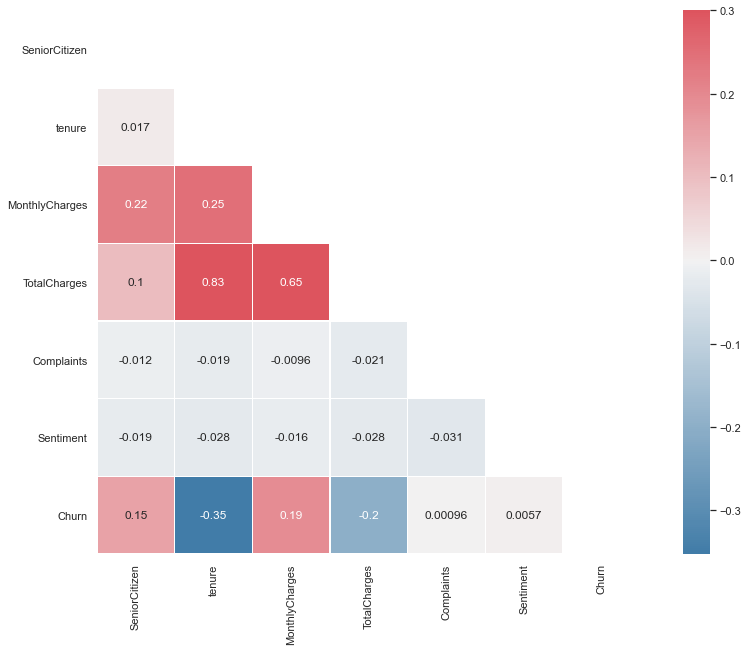

In [14]:
# Using correlation matrix to understand the correlation between numerical variables

df_corr = df_churn.corr()
sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool) #To hid the upper grid of squares.
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

In [15]:
threshold = 0.80
corr_matrix = df_churn.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Get colunm nubers and names with correlation above threshold value.
to_drop = [column for column in upper.columns if any(
    upper[column] >= threshold)]

<ipython-input-15-d44dd031101d>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [16]:
print(f'\n\nThere are {len(to_drop)} columns to drop with correlation > {threshold} --> {list(to_drop)}\n\n')



There are 1 columns to drop with correlation > 0.8 --> ['TotalCharges']




In [17]:
df_churn.shape

(7043, 21)

In [18]:
df_churn.drop('TotalCharges',axis='columns', inplace=True)

In [19]:
df_churn.shape

(7043, 20)

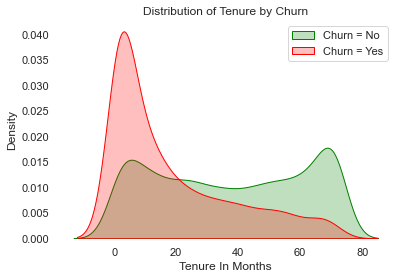

In [20]:
ax = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == 0) ],color="Green", shade = True)
ax = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == 1) ],ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')

ax.set_ylabel('Density')
ax.set_xlabel('Tenure In Months')
ax.set_title('Distribution of Tenure by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
sns.set(rc={'figure.figsize':(20,8)})

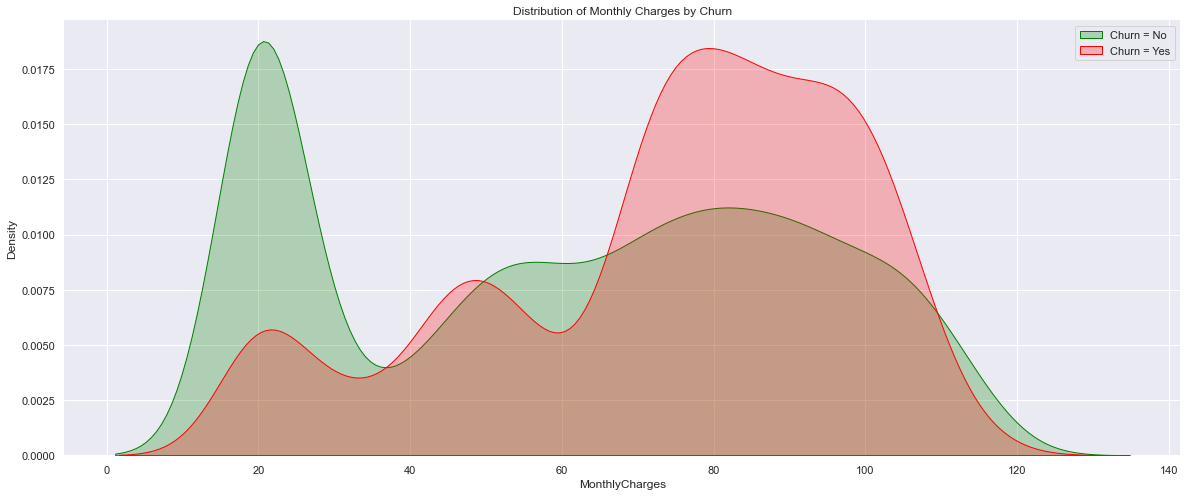

In [21]:
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 0) ],color="Green", shade = True)
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 1) ],ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')

ax.set_ylabel('Density')
ax.set_xlabel('MonthlyCharges')
ax.set_title('Distribution of Monthly Charges by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
sns.set(rc={'figure.figsize':(20,8)})

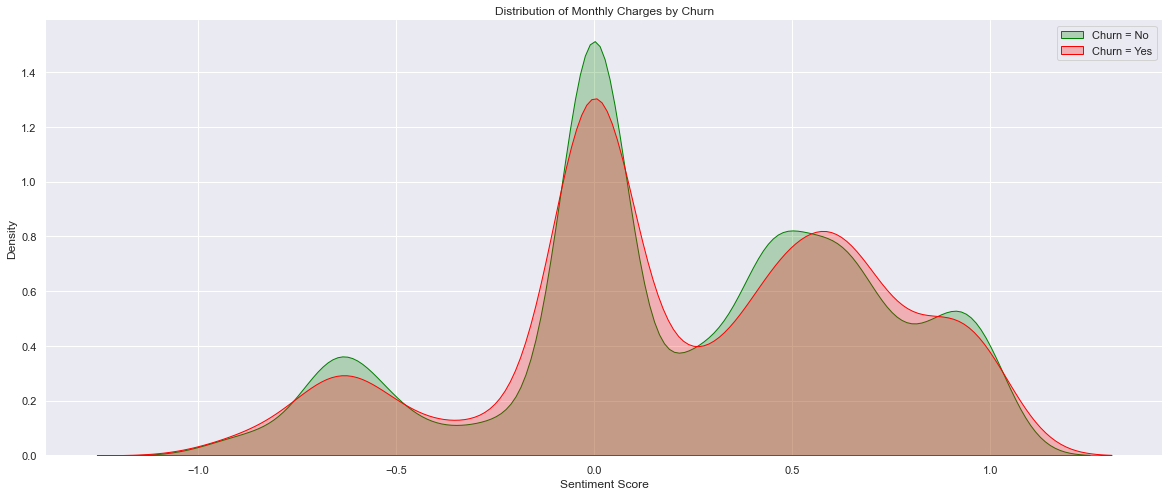

In [22]:
ax = sns.kdeplot(df_churn.Sentiment[(df_churn["Churn"] == 0) ],color="Green", shade = True)
ax = sns.kdeplot(df_churn.Sentiment[(df_churn["Churn"] == 1) ],ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')

ax.set_ylabel('Density')
ax.set_xlabel('Sentiment Score')
ax.set_title('Distribution of Monthly Charges by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
sns.set(rc={'figure.figsize':(20,8)})

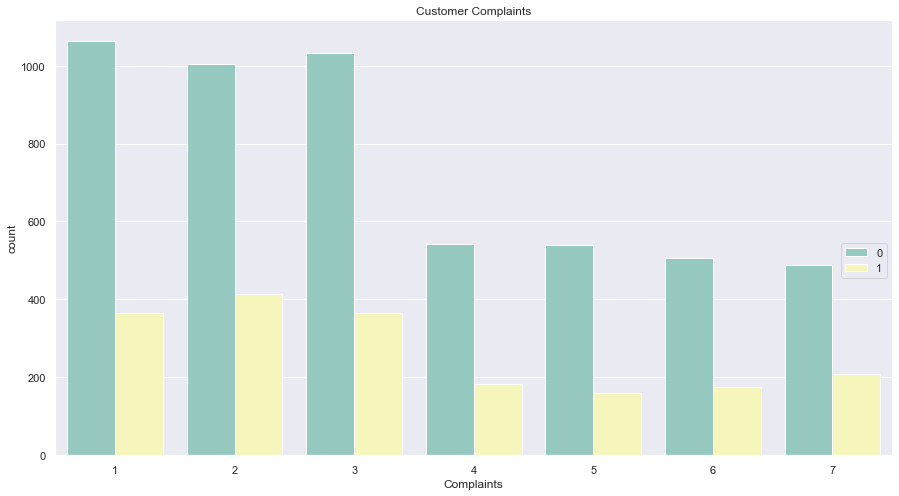

In [23]:
plt.figure(figsize=(15,8))
p=sns.countplot(x=df_churn["Complaints"], hue="Churn",data=df_churn,palette="Set3")
p.set_title('Customer Complaints')
p.legend(bbox_to_anchor=(1,0.5))

In [24]:
df_dummy = pd.get_dummies(df_churn, drop_first=True)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,Complaints,Sentiment,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,EarSub_Yes,Renewedpack_Yes,Renewedpack_no,ReducedChan_Yes,ReducedChan_no
0,0,1,29,4,0.7717,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,0,34,56,4,-0.5423,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,0,2,53,6,0.4404,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,0,45,42,6,0.5267,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,2,70,2,0.6369,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [25]:
df_churnmod=df_dummy
df_churnmod.head()

,SeniorCitizen,tenure,MonthlyCharges,Complaints,Sentiment,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,EarSub_Yes,Renewedpack_Yes,Renewedpack_no,ReducedChan_Yes,ReducedChan_no
0,0,1,29,4,0.7717,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,0,34,56,4,-0.5423,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,0,2,53,6,0.4404,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,0,45,42,6,0.5267,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,2,70,2,0.6369,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


Splitting into Training and Testing Data

In [26]:
y = df_churnmod['Churn']
X = df_churnmod.drop('Churn', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
ranfor = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.741
Test set accuracy:  0.736


In [29]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.67      0.01      0.01       373

    accuracy                           0.74      1409
   macro avg       0.70      0.50      0.43      1409
weighted avg       0.72      0.74      0.63      1409

0.7359829666430092


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ranfor = confusion_matrix(y_test,y_pred)
confusion_matrix_ranfor

array([[1035,    1],
       [ 371,    2]], dtype=int64)

In [31]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
1,tenure,0.109139
7062,PaymentMethod_Electronic check,0.098958
7050,InternetService_Fiber optic,0.073860
7052,OnlineSecurity_No internet service,0.049363
2,MonthlyCharges,0.048915
